In [32]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras import applications
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Input,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
%matplotlib inline

In [33]:
my_data_dir = 'C:\\Users\\Marcin\\Desktop\\Python\\Studia\\RoadClassification\\baza'

In [34]:
val_path = my_data_dir+'\\val\\'
train_path = my_data_dir+'\\train\\'

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
train_image_gen = ImageDataGenerator(rescale=1. /255,# Rescale the image by normalzing it
                                     horizontal_flip = True,
                                     vertical_flip= True,
                                     brightness_range=[0.2,1.0],
                                     featurewise_center=True,
                                     featurewise_std_normalization=True
                              )

In [37]:
val_image_gen = ImageDataGenerator(rescale=1. /255, # Rescale the image by normalzing it
                              )

In [38]:
train_samples = 627
validation_samples = 210
epochs = 50
batch_size = 16
image_shape = (224,224,3)

In [39]:
train_images = train_image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                                  batch_size=batch_size)

Found 627 images belonging to 4 classes.


In [40]:
val_images = val_image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               class_mode='categorical',
                                               batch_size=batch_size,
                                             shuffle = False)

Found 210 images belonging to 4 classes.


In [41]:
"""
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from pyimagesearch import config
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
"""

'\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.applications import VGG16\nfrom keras.layers.core import Dropout\nfrom keras.layers.core import Flatten\nfrom keras.layers.core import Dense\nfrom keras.layers import Input\nfrom keras.models import Model\nfrom keras.optimizers import SGD\nfrom sklearn.metrics import classification_report\nfrom pyimagesearch import config\nfrom imutils import paths\nimport matplotlib.pyplot as plt\nimport numpy as np\nimport pickle\nimport os\n'

In [42]:
baseModel = VGG16(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

In [43]:
headModel = baseModel.output
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(4, activation="softmax")(headModel)

In [44]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [45]:
for layer in baseModel.layers:
	layer.trainable = False

In [46]:
opt = SGD(lr=1e-4, momentum=0.9)

In [47]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [48]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [49]:
with tf.device('/GPU:0'):
    results = model.fit_generator(
        train_images,
        steps_per_epoch=train_samples // batch_size,
        validation_data=val_images,
        validation_steps=validation_samples // batch_size,
        epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']


C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Train for 39 steps, validate for 13 steps
Epoch 1/50


C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\Marcin\Anaconda3\envs\TFgpu\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


39/39 [==============================] - 12s 303ms/step - loss: 1.6962 - accuracy: 0.2504 - val_loss: 1.3856 - val_accuracy: 0.4135
Epoch 2/50
39/39 [==============================] - 10s 254ms/step - loss: 1.3492 - accuracy: 0.3617 - val_loss: 1.2063 - val_accuracy: 0.3413
Epoch 3/50
39/39 [==============================] - 10s 252ms/step - loss: 1.2501 - accuracy: 0.4288 - val_loss: 1.1109 - val_accuracy: 0.5625
Epoch 4/50
39/39 [==============================] - 10s 252ms/step - loss: 1.1581 - accuracy: 0.5155 - val_loss: 0.9975 - val_accuracy: 0.7067
Epoch 5/50
39/39 [==============================] - 10s 262ms/step - loss: 1.1455 - accuracy: 0.4943 - val_loss: 0.9619 - val_accuracy: 0.6587
Epoch 6/50
39/39 [==============================] - 11s 275ms/step - loss: 1.0871 - accuracy: 0.5516 - val_loss: 0.9067 - val_accuracy: 0.7356
Epoch 7/50
39/39 [==============================] - 11s 274ms/step - loss: 1.0581 - accuracy: 0.5728 - val_loss: 0.8978 - val_accuracy: 0.7163
Epoch 8/50

In [11]:
#model = load_model("./modele/FT_vgg16_1.h5")

In [50]:
losses = pd.DataFrame(model.history.history)

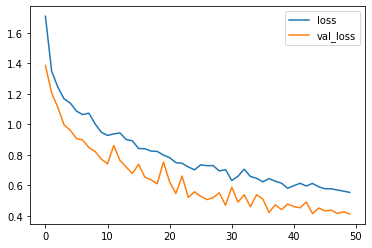

In [51]:
losses[['loss','val_loss']].plot()

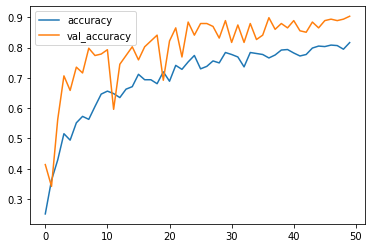

In [52]:
losses[['accuracy','val_accuracy']].plot()

In [18]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
model.evaluate_generator(val_images)

  ...
    to  
  ['...']


[0.38589695415326525, 0.9047619]

In [20]:
def getPredictionsIndices(val_images):
    pred= model.predict_generator(val_images)
    predicted_class_indices=np.argmax(pred,axis=1)
    return predicted_class_indices

In [54]:
predicted_class_indices = getPredictionsIndices(val_images)

In [24]:
def getLabelsIndicesDicts(val_images):
    labelsToIndices = (val_images.class_indices)
    IndicesToLabels = dict((v,k) for k,v in labelsToIndices.items())
    return labelsToIndices, IndicesToLabels

In [31]:
labels, labels2 = getLabelsIndicesDicts(val_images)
labels

{'Asfalt': 0, 'Kostka': 1, 'Polna_v': 2, 'Utwardzona': 3}

In [55]:
print(classification_report(val_images.classes,predicted_class_indices))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85        53
           1       0.85      0.90      0.88        51
           2       0.82      1.00      0.90        50
           3       0.98      0.98      0.98        56

    accuracy                           0.90       210
   macro avg       0.91      0.90      0.90       210
weighted avg       0.92      0.90      0.90       210



In [57]:
confusion_matrix(val_images.classes, predicted_class_indices)

array([[39,  7,  6,  1],
       [ 0, 46,  5,  0],
       [ 0,  0, 50,  0],
       [ 0,  1,  0, 55]], dtype=int64)

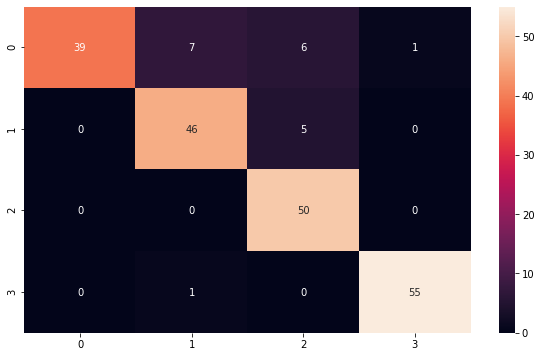

In [58]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(val_images.classes,predicted_class_indices),annot=True)
#y - true 
#x - predicted

In [59]:
model.save("FT_vgg16_1.h5")